# 2장 연습문제

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. 특이하게 생긴 주사위 두 개가 있다. 첫 번째 주사위의 여섯 면에는 1이 두 번, 2가 세 번, 그리고 5가 한 번 나타난다. 두 번째 주사위는 1이 한 번, 3이 두 번, 5가 한 번, 그리고 6이 두 번 나타난다. 

#### (1) 두 주사위 각각에 대해 확률 분포를 구하라.

In [3]:
dice1 = {1:2, 2:3, 5:1}
dice2 = {1:1, 3:2, 4:1, 6:2}

dice1_prob = {k:(v/sum(dice1.values())) for k, v in dice1.items()}
dice2_prob = {k:(v/sum(dice1.values())) for k, v in dice2.items()}

print('주사위1 확률:', dice1_prob)
print('주사위2 확률:', dice2_prob)

주사위1 확률: {1: 0.3333333333333333, 2: 0.5, 5: 0.16666666666666666}
주사위2 확률: {1: 0.16666666666666666, 3: 0.3333333333333333, 4: 0.16666666666666666, 6: 0.3333333333333333}


#### (2) 두 개의 주사위를 같이 던졌을 때 나타나는 수의 합에 대한 확률 분포를 구하라.

In [20]:
dice_sum_prob = {}
for k1, v1 in dice1_prob.items():
    for k2, v2 in dice2_prob.items():
        if k1+k2 in dice_sum_prob:
            dice_sum_prob[k1+k2] += v1*v2
        else:
            dice_sum_prob[k1+k2] = v1*v2
print('주사위 합의 확률:', dice_sum_prob)      
print('확률의 합:', sum(dice_sum_prob.values()))

주사위 합의 확률: {2: 0.05555555555555555, 4: 0.1111111111111111, 5: 0.2222222222222222, 7: 0.1111111111111111, 3: 0.08333333333333333, 6: 0.1111111111111111, 8: 0.2222222222222222, 9: 0.027777777777777776, 11: 0.05555555555555555}
확률의 합: 1.0


### 2. 그림 2.3의 실험 장치가 약간 달라졌다. 주머니 속에는 A와 B가 각각 12장과 4장이 담겨 있다. 또한 A 상자는 하얀 공과 파란 공을 각각 10개와 4개를 가지고 있으며 B 상자는 하얀 공과 파란 공을 각각 3개와 12개를 가지고 있다. 아래 물음에 답하여라.

In [27]:
pocket = {'A':12, 'B':4}
A = {'white':10, 'blue':4}
B = {'white':3, 'blue':12}

#### (1) 상자 B가 선택될 확률은?

In [32]:
pocket_prob = {k:v/sum(pocket.values()) for k, v in pocket.items()}
print('P(B):', pocket_prob['B'])

P(B): 0.25


#### (2) 상자 B에서 파란 공이 뽑일 확률은?

In [36]:
B_prob = {k:v/sum(B.values()) for k, v in B.items()}
print('P(blue|B):', B_prob['blue'])

P(blue|B): 0.8


#### (3) 상자는 A, 공이 파랑이 뽑힐 확률은?

In [37]:
A_prob = {k:v/sum(A.values()) for k, v in A.items()}
joint_prob = pocket_prob['A'] * A_prob['blue']
print('P(A, blue):', joint_prob)

P(A, blue): 0.21428571428571427


#### (4) 파란 공이 뽑힐 확률은?

In [41]:
a_blue = pocket_prob['A'] * A_prob['blue']
b_blue = pocket_prob['B'] * B_prob['blue']
p_blue = a_blue + b_blue
print('P(blue):', p_blue)

P(blue): 0.41428571428571426


#### (5) 파란 공이 관찰되었을 때 그것이 상자 B에서 나왔을 확률은?

In [42]:
post_prob_blue_b = (B_prob['blue'] * pocket_prob['B']) / p_blue
print('P(B:blue):', post_prob_blue_b)

P(B:blue): 0.48275862068965525


### 3. 패턴이 10 차원 특징 벡터로 표현된다. 개별 특징은 [0, 1] 사이의 값을 갖는데 이 범위를 20개 구간으로 나누어 표현하고자 한다. 확률 분포를 히스토그램으로 표현할 때 필요한 메모리 량을 산출하여라.

In [60]:
q = 20 #byte
d = 10
print('20^10(q^d): %dbyte' % q**d)

20^10(q^d): 10240000000000byte


### 4 부류 $\omega_1$의 정규 분포가 $\mu_i=\begin{pmatrix} 3 \\ 2 \end{pmatrix}$와 $\Sigma_i=\begin{pmatrix} 3&1 \\ 1&2\end{pmatrix}$를 갖는다 하자. 사전 확류은 $P(\omega_i)=0.2$라 하자. 이때 (2.34)의 분별 함수 $g_i(x)$를 유도하라.

$g_i(\bf{x})=ln(p(\bf{x}|\omega_i)P(\omega_i))$  

$=-\frac{1}{2}(\bf{x}^T\Sigma^{-1}_i\bf{x} - 2\mu_i^T\Sigma^{-1}_i\bf{x}+\mu_i^T\Sigma^{-1}_i\mu_i) - \frac{d}{2}ln2\pi-\frac{1}{2}ln|\Sigma_i|+lnP(\omega_i)$

In [104]:
x = np.array([[4], [3]])
mean_i = np.array([[3],[2]])
sigma_i = np.array([[3, 1], [1, 2]])
sigma_i_inv = np.linalg.inv(sigma_i)
p_i = 0.2

g_i = -1/2*(np.dot(np.dot(x.T,sigma_i_inv), x)) - 2*(np.dot(np.dot(mean_i.T, sigma_i_inv), x)) + np.dot(np.dot(mean_i.T, sigma_i_inv), mean_i) - 2/2*np.log(2*np.pi) - 1/2*np.log(np.linalg.det(sigma_i)) + np.log(p_i)

print('if x=(4, 3), g_i=', g_i)

if x=(4, 3), g_i= [[-14.15203394]]


### 5. 부류 $\omega_1$과 $\omega_2$가 각각  $\mu_1=\begin{pmatrix} 3 \\ 2 \end{pmatrix}$와 $\Sigma_1=\begin{pmatrix} 3&1 \\ 1&2\end{pmatrix}$과 $\mu_2=\begin{pmatrix} -3 \\ 4\end{pmatrix}$와 $\Sigma_2=\begin{pmatrix} 3&1 \\ 1&2\end{pmatrix}$를 갖는다. $\omega_1$과 $\omega_2$의 결정 경계를 구하라.

분산이 같은 경우로 LDA  
$g_{ij}(x)=g_i(x) - g_j(x)$  
$=(\Sigma^{-1}(\mu_i-\mu_j))^Tx+(lnP(w_i)-lnP(w_j)-\frac{1}{2}\mu^T_i\Sigma^{-1}\mu_i+\frac{1}{2}\mu^T_j\Sigma^{-1}\mu_j)$

In [109]:
x = np.array([[4], [3]])
m1 = np.array([[3],[2]])
m2 = np.array([[-3],[4]])
s = np.array([[3, 1], [1, 2]])
s_inv = np.linalg.inv(s)
p1 = 0.5
p2 = 1 - p1
m
g_ij = np.dot(np.dot(s_inv, m1-m2).T, x) + (p1 - p2 - 1/2*np.dot(np.dot(m1.T, s_inv), m1) + 1/2*np.dot(np.dot(m2.T, s_inv), m2))

print('if x=(4, 3), P(w1)=0.5, P(w2)=0.5 then g_ij=', g_ij)

if x=(4, 3), P(w1)=0.5, P(w2)=0.5 then g_ij= [[ 11.2]]


### 6. 부류 $\omega_1$과 $\omega_2$가 각각  $\mu_1=\begin{pmatrix} 3 \\ 2 \end{pmatrix}$와 $\Sigma_1=\begin{pmatrix} 3&1 \\ 1&2\end{pmatrix}$과 $\mu_2=\begin{pmatrix} -3 \\ 4\end{pmatrix}$와 $\Sigma_2=\begin{pmatrix} 1/2&0 \\ 0&2\end{pmatrix}$를 갖는다. $\omega_1$과 $\omega_2$의 결정 경계를 구하라.

분산이 다른 경우로 QDA  
$g_i=-\frac{1}{2}(\bf{x}^T\Sigma^{-1}_i\bf{x}) + \mu_i^T\Sigma^{-1}_i\bf{x} + (-\frac{1}{2}\mu_i^T\Sigma^{-1}_i\mu_i) -\frac{1}{2}ln|\Sigma_i|+lnP(\omega_i))$

In [117]:
x = np.array([[4], [3]])
m1 = np.array([[3],[2]])
m2 = np.array([[-3],[4]])
s1 = np.array([[3, 1], [1, 2]])
s1_inv = np.linalg.inv(s1)
s2 = np.array([[1/2, 0], [0, 2]])
s2_inv = np.linalg.inv(s2)
p1 = 0.5
p2 = 1 - p1

g1 = -1/2*(np.dot(np.dot(x.T,s1_inv), x)) + (np.dot(np.dot(m1.T, s1_inv), x)) - 1/2*np.dot(np.dot(m1.T, s1_inv), m1) - 1/2*np.log(np.linalg.det(s1)) + np.log(p1)
g2 = -1/2*(np.dot(np.dot(x.T,s2_inv), x)) + (np.dot(np.dot(m2.T, s2_inv), x)) - 1/2*np.dot(np.dot(m2.T, s2_inv), m2) - 1/2*np.log(np.linalg.det(s2)) + np.log(p2)
g12 = g1 - g2

print('if x=(4, 3), P(w1)=0.5, P(w2)=0.5 then g_ij=', g12)

if x=(4, 3), P(w1)=0.5, P(w2)=0.5 then g_ij= [[ 48.14528104]]


### 7. $\mu=\begin{pmatrix} 3 \\ 2 \end{pmatrix}$와 $\Sigma=\begin{pmatrix} 3&1 \\ 1&2\end{pmatrix}$인 경우에 대해 $x=(-3,4)^T$에서 $\mu$까지의 마할라노비스 거리와 유클리디언 거리를 구하여라.

Mahalanobis distance = $\sqrt{(x-\mu_i)^T\Sigma^{-1}(x-\mu_i))}$  
Euclidean distance = $\sqrt{(x-\mu_i)^T(x-\mu_i))}$

In [120]:
x = np.array([[-3], [4]])
m = np.array([[3],[2]])
s = np.array([[3, 1], [1, 2]])
s_inv = np.linalg.inv(s)

mah_dist = np.sqrt(np.dot(np.dot((x-m).T, s_inv), (x-m)))
euc_dist = np.sqrt(np.dot((x-m).T, (x-m)))
print('mahalanobis distance:', mah_dist)
print('euclidean distance:', euc_dist)

mahalanobis distance: [[ 4.64758002]]
euclidean distance: [[ 6.32455532]]


### 8. 베이시언 분류기는 오류 확률에 대해 최적이다. 이 사실을 증명하라.

### 9. 기각율과 오류율은 어떤 관계를 갖느가? 그 경향을 나타내는 그래프를 그려라

잘 모르는 상황에 대해서 기각하는 비율이 높아지면 그 만틈 틀릴 확률도 낮아진다.
즉 기각율이 높으면 오류율은 떨어진다.

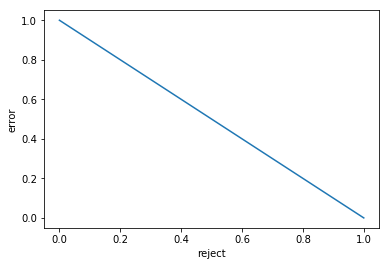

In [13]:
error = 1.0
reject = np.linspace(0.0, 1.0, num=10)
error_with_reject = error - reject
plt.xlabel('reject')
plt.ylabel('error')
plt.plot(reject, error_with_reject)

### 10. 분류가 두 개이고 특징 공간이 1 차원인 상황을 생각해 보자. $\omega_1$과 $\omega_2$가 각각 $N(a, \sigma^2)$과 $N(b, \sigma^2)$을 갖는다고 가정하자. 이때 평균 오류를 최소로 하는 결정 경계는 아래와 같음을 보여라.
$t=\frac{a+b}{2}-\frac{\sigma^2}{a-b}ln\frac{P(\omega_1)}{P(\omega_2)}$

분산이 같은 경우로 식(2.38)을 위의 값을 넣고 전개한다.

### 11. 문제 10에서 평균 위험을 최소로 하는 결정 경계를 구하여라. 이때 $\lambda_{11}=\lambda_{22}=0$이라 가정하자. 

부호를 반대로 하고 a, b앞에 각각 $\lambda_{12}, \lambda_{21}$ 곱해준다.

$t=-\frac{\lambda_{12}a+\lambda_{21}b}{2}+\frac{\sigma^2}{\lambda_{12}a-\lambda_{21}b}ln\frac{P(\omega_1)}{P(\omega_2)}$

### 12. Iris 데이터를 인터넷에서 구하라. 컴퓨터 프로그램을 사용하여 평균 벡터와 공분산 행렬을 구하라. 컴퓨터 프로그램은 MatLab같은 소프트웨어를 사용하거나 C 같은 언어로 자신이 직접 작성한 프로그램을 사용하라.

In [34]:
import numpy as np
from sklearn import datasets
from collections import defaultdict

# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = datasets.load_iris()
X = iris.data
Y = iris.target
target_names = iris.target_names # 'setosa', 'versicolor', virginica'

cls = defaultdict(list)

for x, y in zip(X, Y):
    cls[target_names[y]].append(x)

for key in cls.keys():
    mean_vector = np.mean(cls[key], axis=0)
    covarience = np.cov(cls[key], rowvar=False)
    print(key)
    print('mean_vector:', mean_vector)
    print('covariance\n', covarience)

setosa
mean_vector: [ 5.006  3.418  1.464  0.244]
covariance
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
versicolor
mean_vector: [ 5.936  2.77   4.26   1.326]
covariance
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
virginica
mean_vector: [ 6.588  2.974  5.552  2.026]
covariance
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]
